In [14]:
import zipfile
from tqdm import tqdm

zip_path = r"D:\Sumon\Coding\Projects\creditcard.csv.zip"
extract_to = r"D:\Sumon\Coding\Projects"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    files = zip_ref.namelist()
    for file in tqdm(files, desc="Extracting", unit="file"):
        zip_ref.extractall(extract_to)
print("Unzipping complete")

Extracting: 100%|██████████| 1/1 [00:01<00:00,  1.65s/file]

Unzipping complete


In [1]:
import pandas as pd
credit = pd.read_csv("creditcard.csv")
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
credit.isnull().values.any()

False

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

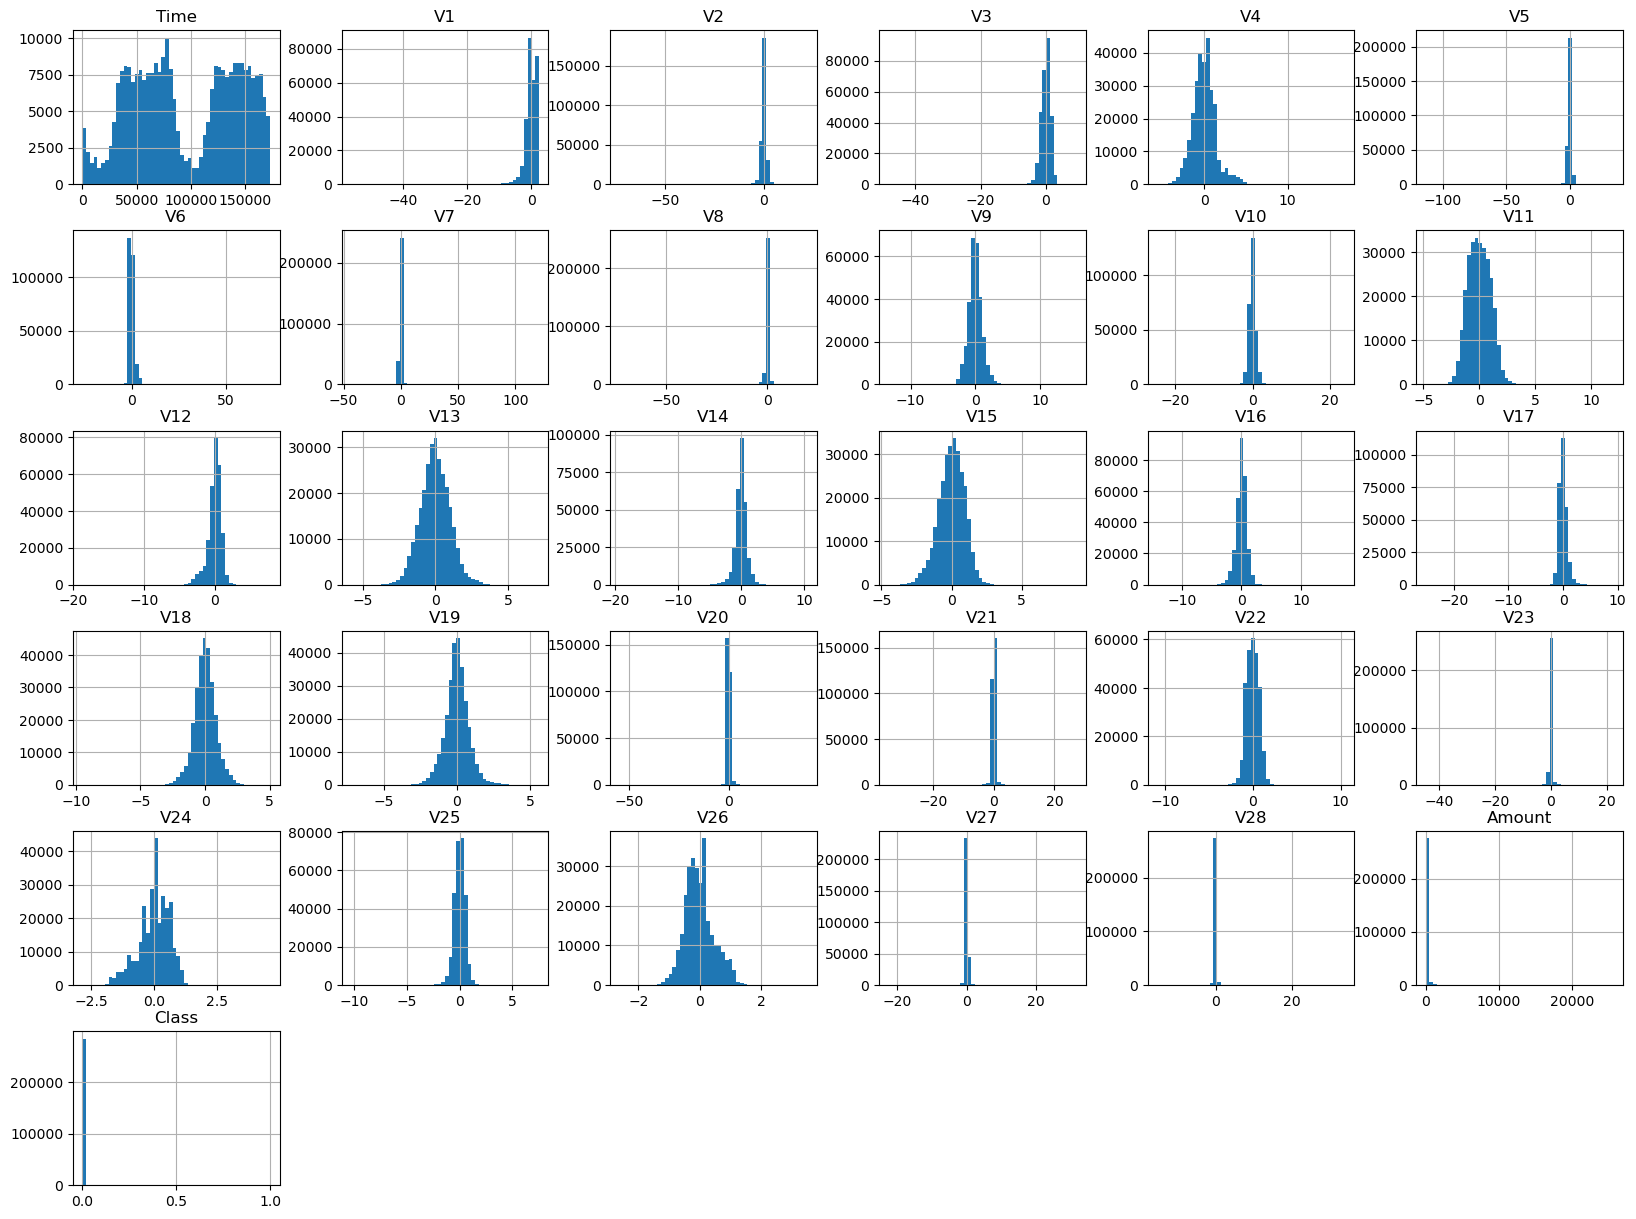

In [4]:
credit.hist(bins=50, figsize=(20,15))

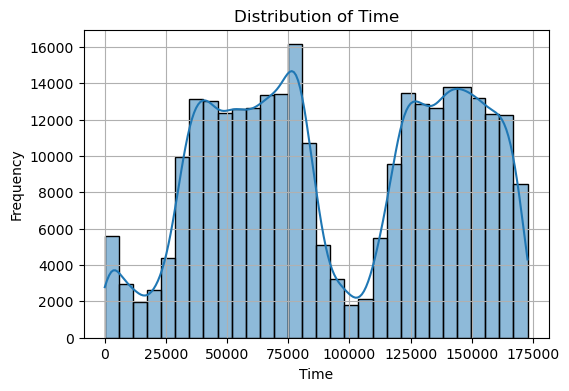

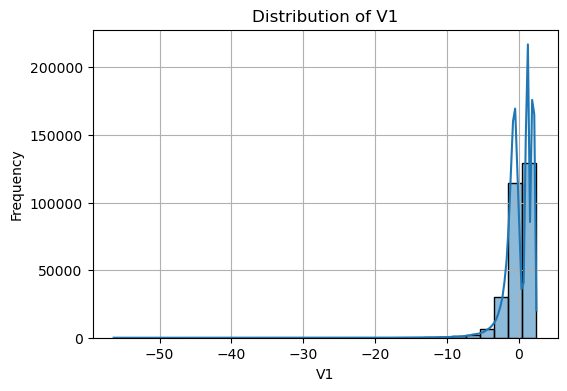

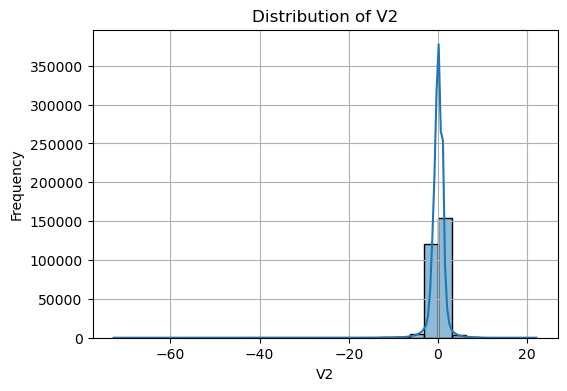

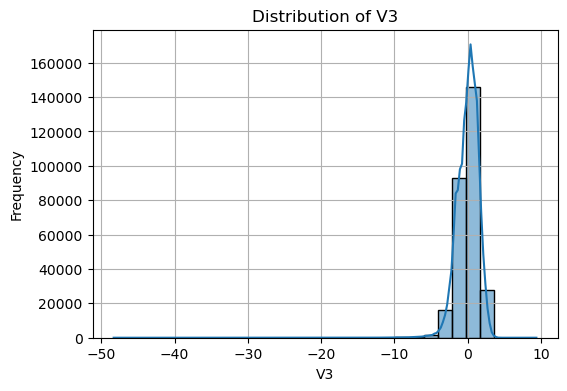

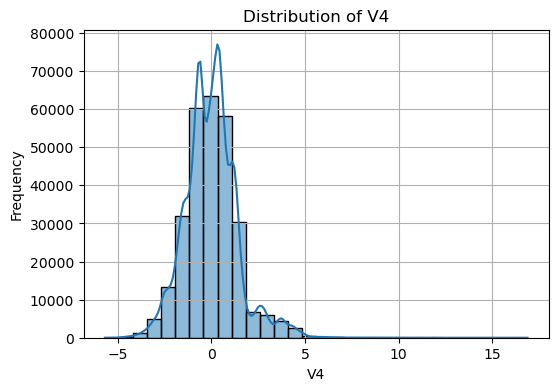

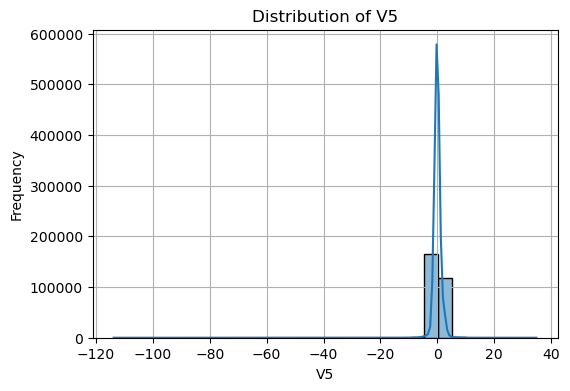

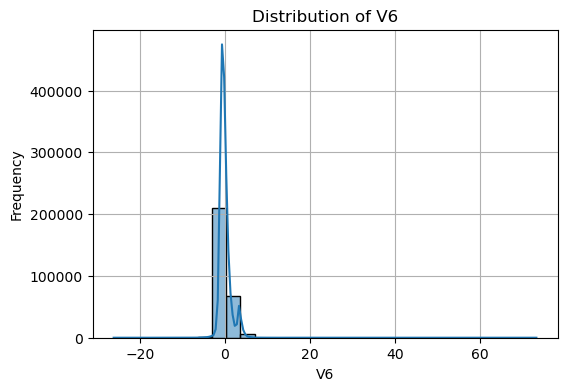

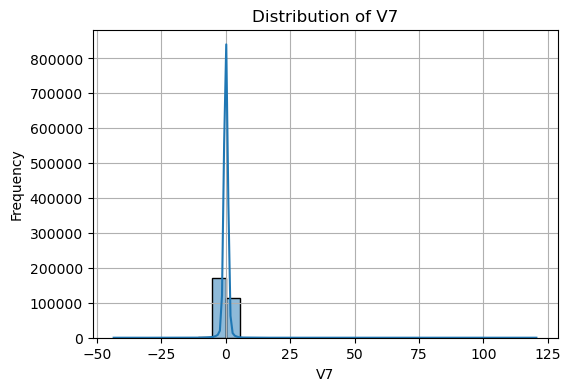

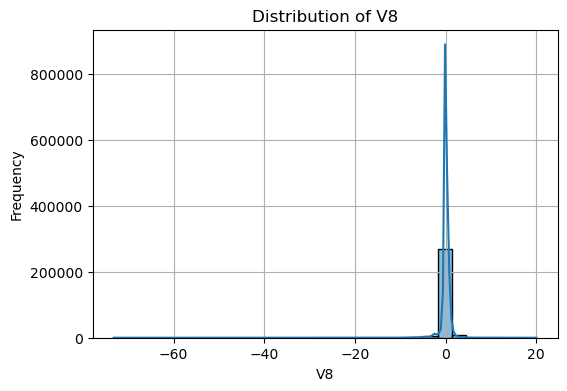

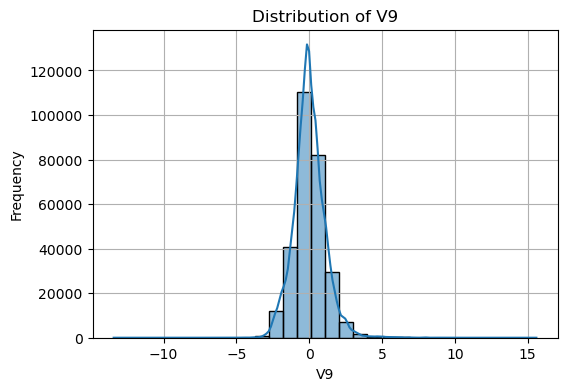

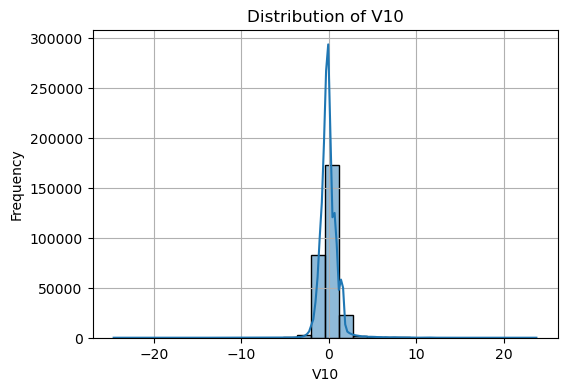

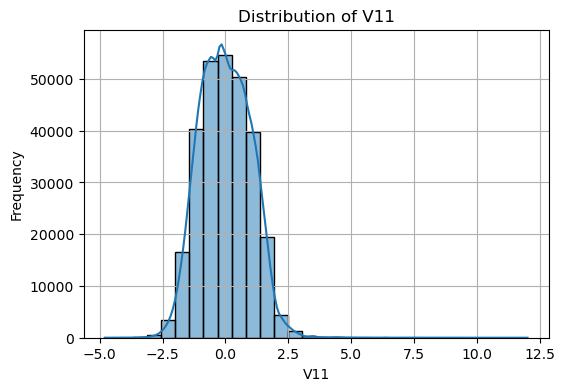

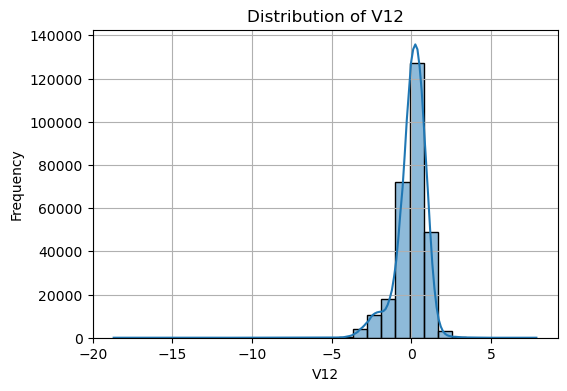

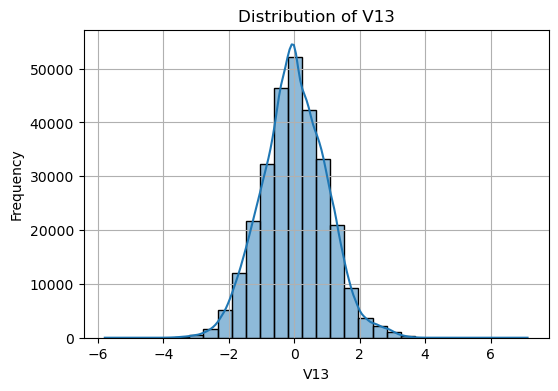

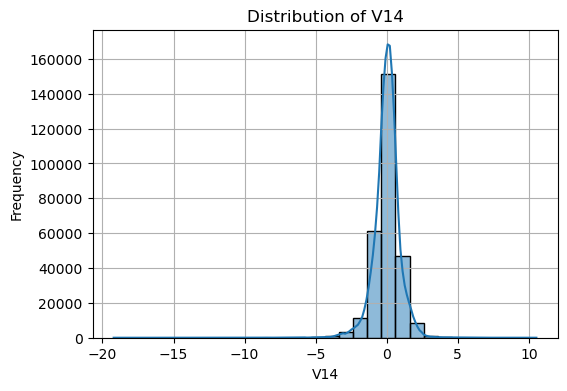

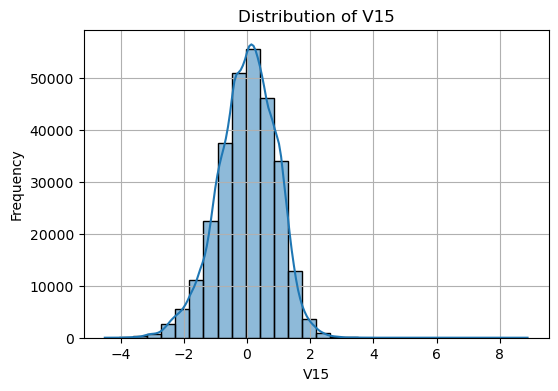

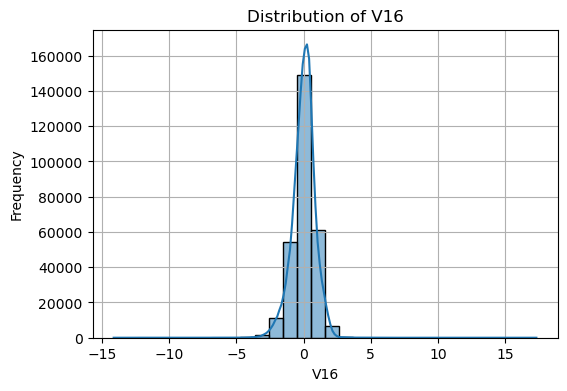

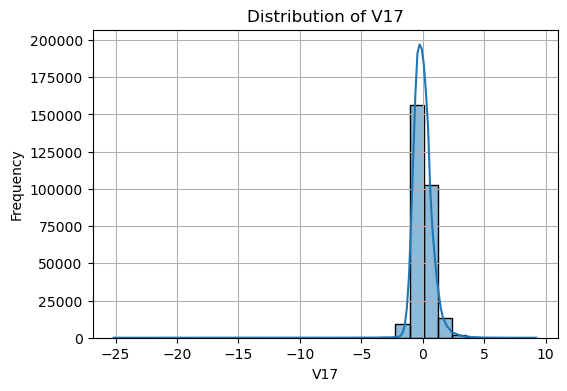

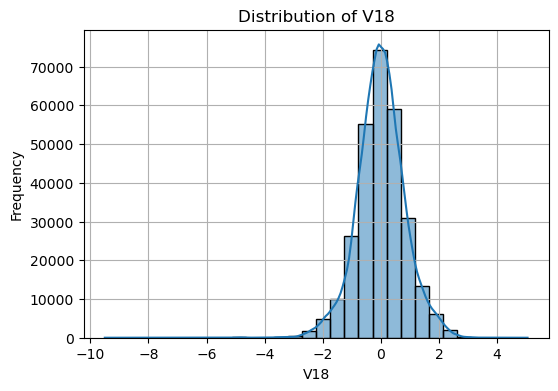

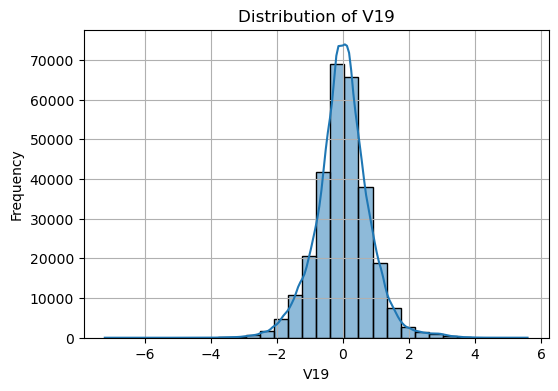

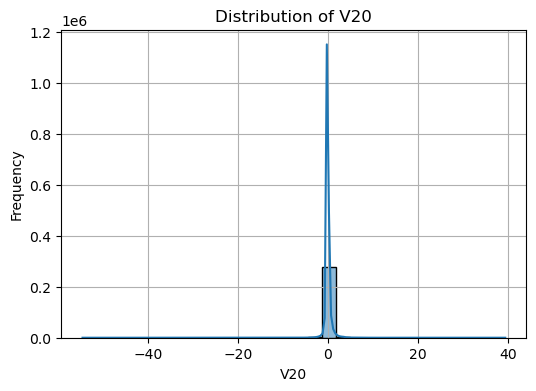

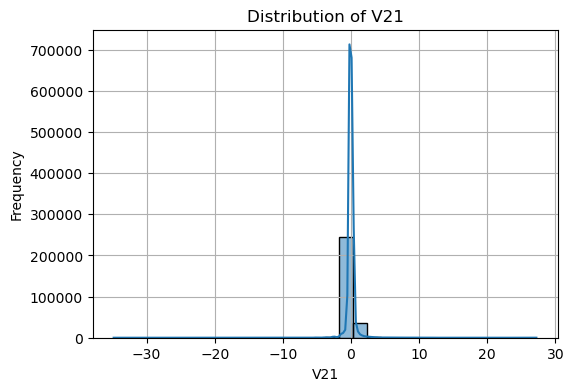

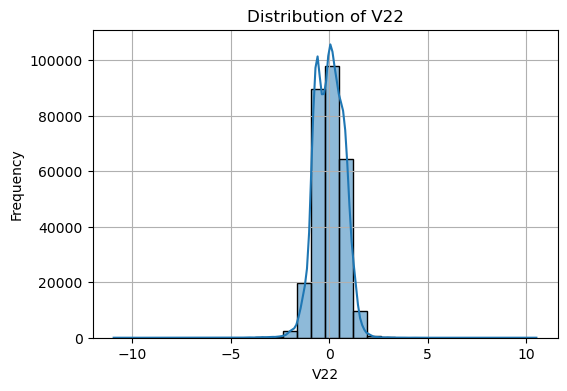

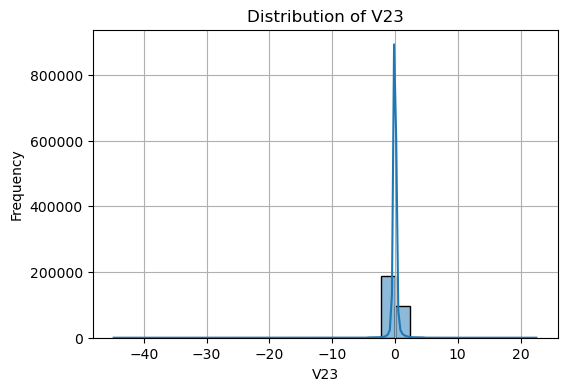

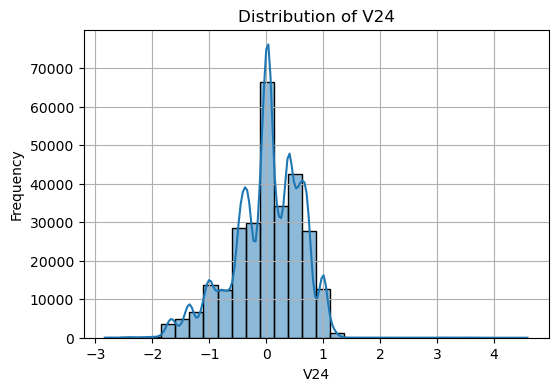

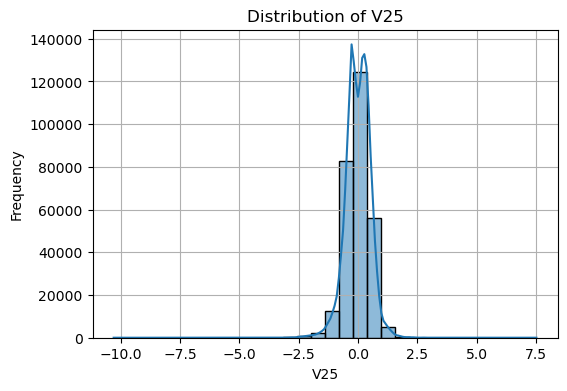

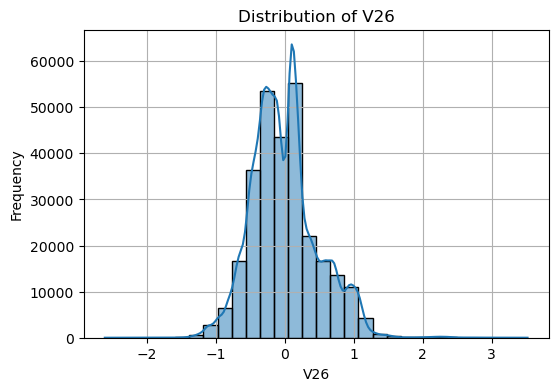

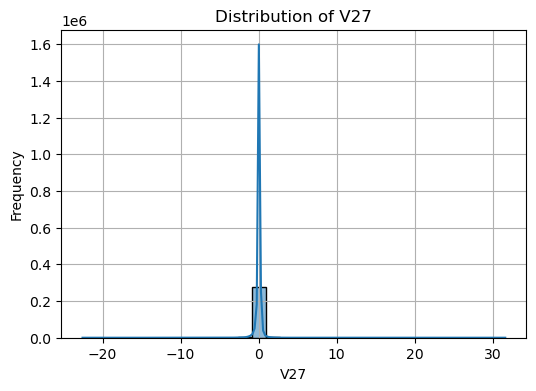

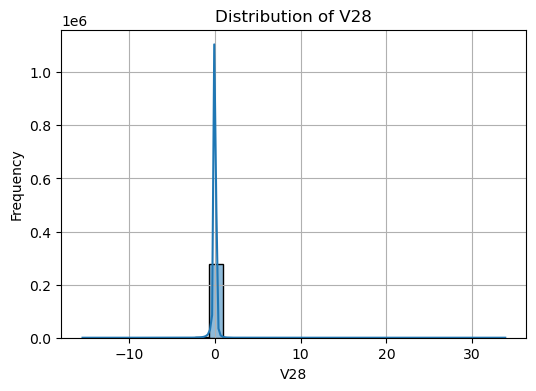

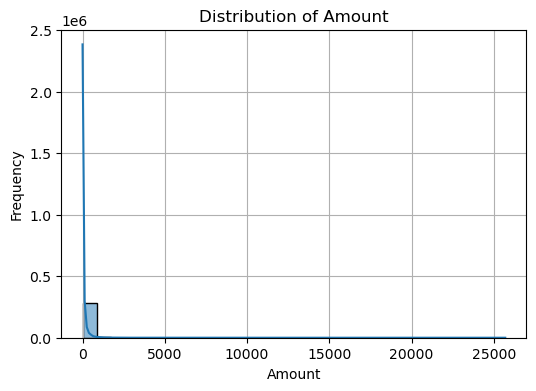

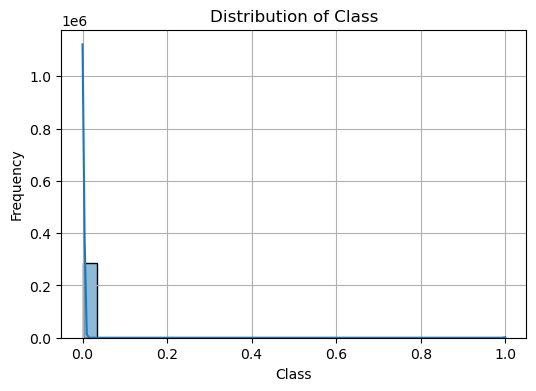

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in credit.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(credit[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()


In [6]:
credit["Class"].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

In [16]:
X = credit.drop(columns="Class")
y = credit["Class"]

In [17]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
import numpy as np
from sklearn.cluster import KMeans
def kmeans_cluster(X, n_clusters):
    return KMeans(n_clusters=n_clusters, random_state=42).fit_transform(X)

In [19]:
numerical_features = ["Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14",
                     "V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28",
                     "Amount"]
bimodal_features = ["V26", "V22", "V24", "V4", "V1"]
right_skewd = ["V15", "V12"]
left_skewd = ["V6"]
time = ["Time"]

log_transformer = FunctionTransformer(np.log1p, validate=True)
Square_transformer = FunctionTransformer(lambda x: x ** 2, validate=True)


numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
])

right_skewd_transformer = Pipeline(steps=[
    ("log_trans", log_transformer)
])

left_skewd_transformer = Pipeline(steps=[
    ("sq_tran", Square_transformer)
])


bimodal_transformer = Pipeline(steps=[
    ("kmeans", FunctionTransformer(lambda x: kmeans_cluster(x, n_clusters=2)))
])

time_transformer = Pipeline(steps=[
    ("time_tran", FunctionTransformer(lambda x: kmeans_cluster(x, n_clusters=3)))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("right", right_skewd_transformer, right_skewd),
        ("left", left_skewd_transformer, left_skewd),
        ("bimo", bimodal_transformer, bimodal_features),
        ("time", time_transformer, time)
    ]
)

In [26]:
preprocessor.fit_transform(X_train)
preprocessor.transform(X_test)

c:\Users\abusu\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:379: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
c:\Users\abusu\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:379: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


array([[-1.12151562e+00, -8.42703903e+00,  5.14864020e+00, ...,
         3.28113600e+04,  1.00621381e+05,  5.81574624e+03],
       [-1.06346299e+00,  1.74049523e-01, -1.64365414e+00, ...,
         3.00553600e+04,  9.78653810e+04,  8.57174624e+03],
       [-1.24834248e+00,  7.14490291e-01, -3.52765847e-01, ...,
         3.88323600e+04,  1.06642381e+05,  2.05253758e+02],
       ...,
       [-1.32360446e+00,  3.81595582e-01, -6.14986139e-01, ...,
         4.24053600e+04,  1.10215381e+05,  3.77825376e+03],
       [ 9.75161440e-01,  1.06174851e+00,  1.01992302e-01, ...,
         6.67266400e+04,  1.08338103e+03,  1.05353746e+05],
       [-7.06848008e-01,  5.57447774e-01, -3.94011146e-02, ...,
         1.31253600e+04,  8.09353810e+04,  2.55017462e+04]])

In [27]:
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [29]:
model = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("classifier", RandomForestClassifier(random_state=42))
])

model.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [30]:
model.score(X_test, y_test)

0.9995201479348805

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

In [33]:
f1

0.8530465949820788

In [34]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_train_resampled, y_train_resampled, scoring='f1')
print("Cross-validation F1 scores: ", scores)
print("Mean F1 score", scores.mean())
print("Standard deviation of F1 scores: ", scores.std())

Cross-validation F1 scores:  [0.99989951 0.99991207 0.99991207 0.99984928 0.99989951]
Mean F1 score 0.9998944864376373
Standard deviation of F1 scores:  2.3292661208736614e-05


In [35]:
score2 = model.score(X_train_resampled, y_train_resampled)
score2

1.0